# Assignment 2: 

### By Rahul Hosakere Ravishankara z5419267

In [1]:
# Import the required python packages
import numpy as np
import cmath, math
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy import linalg  
from scipy.linalg import expm
from scipy.linalg import logm

### Section 1.1 

In [247]:
#Pauli Matricies 
sigma_x = np.array([[0,1],[1,0]]) 
sigma_z= np.array([[1,0],[0,-1]])

#Tensor product for pauli x 
sigma_xL = np.kron(sigma_x, np.identity(2))
sigma_xR = np.kron(np.identity(2), sigma_x)

#Tensor product for pauli z 
sigma_zL = np.kron(sigma_z, np.identity(2))
sigma_zR = np.kron(np.identity(2), sigma_z)

#constants 
h = 6.626e-34
h_bar = h/(np.pi)
delta_0 = 1e9 * h
e = -1.602e-19
G = 1e9 * h
V_0 = 1

Vtl = 0
Vtr = 0
VuL = 0
VuR = 0
VdL = 0
VdR = 0
delta_Vl = VuL-VdL
delta_Vr = VuR-VdL

#delta values 
delta_L = delta_0 * np.exp(Vtl/V_0)
delta_R = delta_0 * np.exp((Vtr/V_0))

#epsilon values 
epsilon_L = e * delta_Vl
epsilon_R = e * delta_Vr

H_left = delta_L * sigma_xL + epsilon_L * sigma_zL
H_right = delta_R * sigma_xR + epsilon_R * sigma_zR
H_coupled = G * (sigma_zL @ sigma_zR)

#final hamiltonian
H = H_right + H_left + H_coupled 

print('The Hamiltonian is: ')
print(H)


The Hamiltonian is: 
[[ 6.626e-25  6.626e-25  6.626e-25  0.000e+00]
 [ 6.626e-25 -6.626e-25  0.000e+00  6.626e-25]
 [ 6.626e-25  0.000e+00 -6.626e-25  6.626e-25]
 [ 0.000e+00  6.626e-25  6.626e-25  6.626e-25]]


### Section 1.2

In [21]:
E, V = LA.eig(H) #eigenvalues and eigenvectors for Hamiltonian
idx = np.argsort(E) 
E = E[idx]
V = V[:, idx]

print('Eigenvalues are: ')
print(E)
print('Eigenvectors are: ')
print(V)

Eigenvalues are: 
[-1.48161864e-24 -6.62600000e-25  6.62600000e-25  1.48161864e-24]
Eigenvectors are: 
[[-3.71748034e-01  4.05946183e-17 -7.07106781e-01  6.01500955e-01]
 [ 6.01500955e-01 -7.07106781e-01 -4.16333634e-17  3.71748034e-01]
 [ 6.01500955e-01  7.07106781e-01 -4.16333634e-17  3.71748034e-01]
 [-3.71748034e-01 -1.45581694e-17  7.07106781e-01  6.01500955e-01]]


In [22]:
expec_l = np.zeros((2,4)) #array for expec values on left 

#Calculate expectation values for z and x on the left 
for i in range(4): 
    expec_l[0,i] = np.real(V[:,i] @ sigma_xL @ V[:,i].T)
    expec_l[1, i] = np.real(V[:,i] @ sigma_zL @ V[:,i].T)
        
expec_r = np.zeros((2,4)) #array for excpec values on the right 

#Calculate expectation values for z and x on the right 
for l in range(4): 
    expec_r[0,l] = np.real(V[:,l] @ sigma_xR @ V[:,l].T)
    expec_r[1, l] = np.real(V[:,l] @ sigma_zR @ V[:,l].T)
    

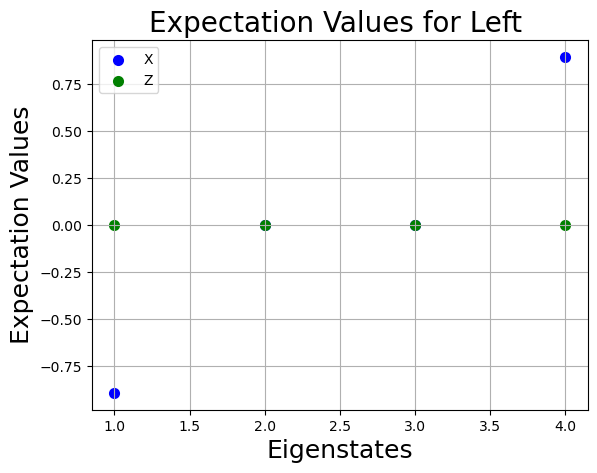

In [220]:
#plot expectation values on Left
plt.figure(1)
plt.scatter([1,2,3,4] , expec_l[0,:], label='X', color='blue', linewidth = 2)
plt.scatter([1,2,3,4] , expec_l[1,:], label='Z', color='green', linewidth = 2)
plt.title('Expectation Values for Left ', fontsize = 20)
plt.xlabel('Eigenstates', fontsize = 18)
plt.ylabel('Expectation Values', fontsize = 18)
plt.grid(True)
plt.legend()
plt.show()

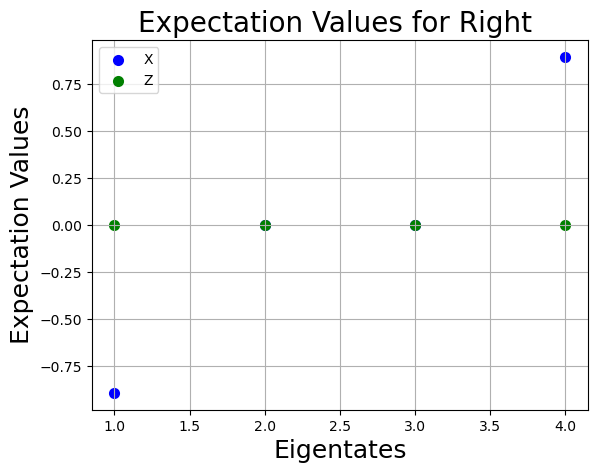

In [219]:
#plot expectation values for right
plt.figure(1)
plt.scatter([1,2,3,4] , expec_r[0,:], label='X', color='blue', linewidth = 2)
plt.scatter([1,2,3,4] , expec_r[1,:], label='Z', color='green', linewidth = 2)
plt.title('Expectation Values for Right ', fontsize = 20)
plt.xlabel('Eigentates', fontsize = 18)
plt.ylabel('Expectation Values', fontsize = 18)
plt.grid(True)
plt.legend()
plt.show()

### Section 1.3: 

In [241]:
#function to calculate partial trace of matrix
def partial_A(rho):
    A = np.matrix([[(rho[0,0]+rho[1,1]),(rho[0,2]+rho[1,3])],[(rho[2,0]+rho[3,1]),(rho[2,2]+rho[3,3])]])
    return A

In [242]:
rho = np.zeros((4,4,4)) 

#fill each index of rho with 4x4 matrix  
for i in range(4):
    rho[i] = np.outer(V[:,i], V[:,i].T)

#calculate partial trace each index of rho
par_rho = np.zeros((4,2,2))

for j in range(4):
    par_rho[j] = partial_A(rho[j])
    

#calculate the entanglement entropy
entropy = np.zeros(4)
for k in range(4):
    entropy[k] = -np.trace((par_rho[k]) @ logm(par_rho[k]))
    
print('The entanglement entropy of the systems are: ')
print(entropy)


The entanglement entropy of the systems are: 
[0.20663931 0.69314718 0.69314718 0.20663931]


### Section 1.4:

In [233]:
#function to calculate hamiltonian varying voltages
def find_ham(Vtl,Vtr,delta_Vl,delta_Vr):
    #Pauli Matricies 
    sigma_x = np.array([[0,1],[1,0]]) 
    sigma_z= np.array([[1,0],[0,-1]])

    #Tensor product for pauli x 
    sigma_xL = np.kron(sigma_x, np.identity(2))
    sigma_xR = np.kron(np.identity(2), sigma_x)

    #Tensor product for pauli z 
    sigma_zL = np.kron(sigma_z, np.identity(2))
    sigma_zR = np.kron(np.identity(2), sigma_z)

    #constants 
    h = 6.626e-34
    delta_0 = 1e9 * h
    e = -1.602e-19
    G = 1e9 * h
    V_0 = 1
    
    delta_L = delta_0 * np.exp(Vtl/V_0)
    delta_R = delta_0 * np.exp((Vtr/V_0))
    
    epsilon_L = e * delta_Vl
    epsilon_R = e * delta_Vr

    H_left1 = delta_L * sigma_xL + epsilon_L * sigma_zL
    H_right1 = delta_R * sigma_xR + epsilon_R * sigma_zR
    H_coupled1 = G * (sigma_zL @ sigma_zR)

    #final hamiltonian
    H1 = H_right1 + H_left1 + H_coupled1 
    
    return H1

In [512]:
#a) Max entanglement

#for max entanglement we want lowest possible energy level
Vtl = -5
Vtr = -5
delta_Vl = 0
delta_Vr = 0

H1 = find_ham(Vtl,Vtr,delta_Vl,delta_Vr)

E1, V1 = LA.eig(H1) #eigenvalues and eigenvectors for Hamiltonian
idx = np.argsort(E1) 
E1 = E1[idx]
V1 = V1[:, idx]

rho1 = np.zeros((4,4,4))

#fill each index of rho1 with 4x4 matrix 
for i in range(4):
    rho1[i] = np.outer(V1[:,i], V1[:,i])

#calculate partial trace of each index of rho1
par_rho1 = np.zeros((4,2,2))
for j in range(4):
    par_rho1[j] = partial_A(rho1[j])
    
#calculate entanglement entropy
entropy1 = np.zeros(4)
for k in range(4):
    entropy1[k] = -np.trace((par_rho1[k]) @ logm(par_rho1[k]))
    
print('The entanglement entropy of the systems are: ')
print(entropy1)


The entanglement entropy of the systems are: 
[0.69305639 0.69314718 0.69314718 0.69305639]


In [503]:
#b) Both electrons in upper dots

#We need to bias voltages to make both electrons in up position
Vtl = 5
Vtr = -5
delta_Vl = 5
delta_Vr = 5

H2 = find_ham(Vtl,Vtr,delta_Vl,delta_Vr)

E2, V2 = LA.eig(H2) #eigenvalues and eigenvectors for Hamiltonian
idx = np.argsort(E2) 
E2 = E2[idx]
V2 = V2[:, idx]

expec_l1 = np.zeros((2,4)) #array for expec values on left 

#Calculate expectation values for z and x on the left 
for i in range(4): 
    expec_l1[0,i] = np.real(V2[:,i] @ sigma_xL @ V2[:,i].T)
    expec_l1[1, i] = np.real(V2[:,i] @ sigma_zL @ V2[:,i].T)
        
expec_r1 = np.zeros((2,4)) #array for excpec values on the right 

#Calculate expectation values for z and x on the right 
for l in range(4): 
    expec_r1[0,l] = np.real(V2[:,l] @ sigma_xR @ V2[:,l].T)
    expec_r1[1, l] = np.real(V2[:,l] @ sigma_zR @ V2[:,l].T)

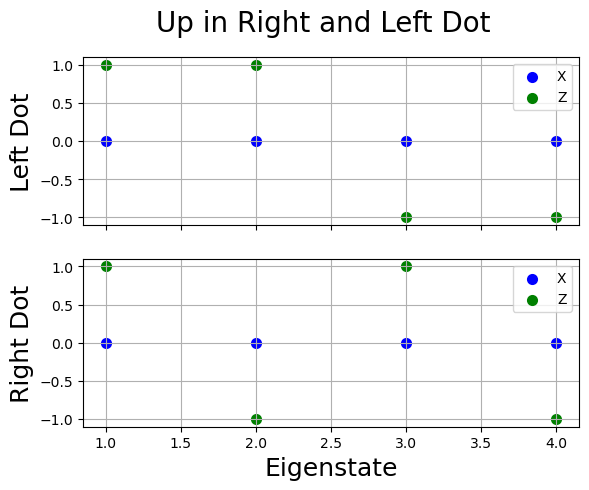

In [504]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)

fig.suptitle('Up in Right and Left Dot', fontsize = 20)
ax1.scatter([1,2,3,4], expec_l1[0,:], label='X', color='blue', linewidth = 2)
ax1.scatter([1,2,3,4], expec_l1[1,:], label='Z', color='green', linewidth = 2)
ax1.set_ylabel('Left Dot', fontsize = 18)
ax1.legend()
ax1.grid(True)

ax2.scatter([1,2,3,4], expec_r1[0,:], label='X', color='blue', linewidth = 2)
ax2.scatter([1,2,3,4], expec_r1[1,:], label='Z', color='green', linewidth = 2)
ax2.set_ylabel('Right Dot', fontsize = 18)
ax2.set_xlabel('Eigenstate', fontsize = 18)
ax2.legend()
ax2.grid(True)


In [495]:
#c) Left in upper dot, Right in lower dot\

Vtl = -5
Vtr = 5
delta_Vl = 5
delta_Vr = -5

H3 = find_ham(Vtl,Vtr,delta_Vl,delta_Vr)

E3, V3 = LA.eig(H3) #eigenvalues and eigenvectors for Hamiltonian
idx = np.argsort(E3) 
E3 = E3[idx]
V3 = V3[:, idx]

expec_l2 = np.zeros((2,4)) #array for expec values on left 

#Calculate expectation values for z and x on the left 
for i in range(4): 
    expec_l2[0,i] = np.real(V3[:,i] @ sigma_xL @ V3[:,i].T)
    expec_l2[1, i] = np.real(V3[:,i] @ sigma_zL @ V3[:,i].T)
        
expec_r2 = np.zeros((2,4)) #array for excpec values on the right 

#Calculate expectation values for z and x on the right 
for l in range(4): 
    expec_r2[0,l] = np.real(V3[:,l] @ sigma_xR @ V3[:,l].T)
    expec_r2[1, l] = np.real(V3[:,l] @ sigma_zR @ V3[:,l].T)

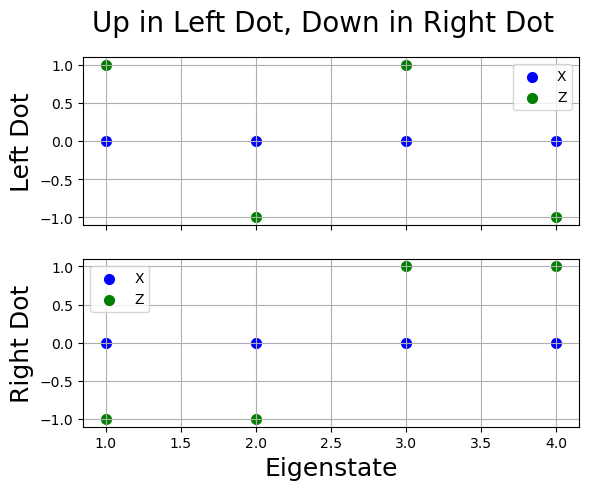

In [555]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Up in Left Dot, Down in Right Dot', fontsize = 20)
ax1.scatter([1,2,3,4], expec_l2[0,:], label='X', color='blue', linewidth = 2)
ax1.scatter([1,2,3,4], expec_l2[1,:], label='Z', color='green', linewidth = 2)
ax1.set_ylabel('Left Dot', fontsize = 18)
ax1.legend()
ax1.grid(True)

ax2.scatter([1,2,3,4], expec_r2[0,:], label='X', color='blue', linewidth = 2)
ax2.scatter([1,2,3,4], expec_r2[1,:], label='Z', color='green', linewidth = 2)
ax2.set_ylabel('Right Dot', fontsize = 18)
ax2.set_xlabel('Eigenstate', fontsize = 18)
ax2.legend()
ax2.grid(True)

### Section 1.5: 

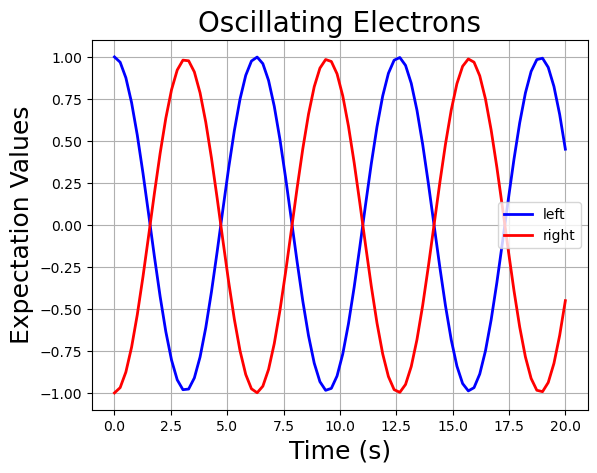

In [611]:
time = np.linspace(0,20,80)
length = len(time)

def expec_val(H, psi0, t, I_k):
    ket = expm((-1j*H*t)/h_bar) @ psi0
    bra = np.conj(ket.T)
    expec = bra @ I_k @ ket 
    return expec 

expec_val_time_l = np.zeros((length), dtype = complex)
expec_val_time_r = np.zeros((length), dtype = complex)

Vtl = -2.5
Vtr = -2.5
delta_Vl = 0
delta_Vr = 0

H4 = find_ham(Vtl, Vtr, delta_Vl, delta_Vr)

for i in range(length): 
    expec_val_time_l[i] = expec_val(H4, V3[:,0], time[i], sigma_zL)
    
    expec_val_time_r[i] = expec_val(H4, V3[:,0], time[i], sigma_zR)


plt.plot(time, expec_val_time_l, label='left', color='blue', linewidth = 2)
plt.plot(time, expec_val_time_r, label = 'right', color = 'red', linewidth =2)
plt.title('Oscillating Electrons', fontsize = 20)
plt.xlabel('Time (s)', fontsize = 18)
plt.ylabel('Expectation Values', fontsize = 18)
plt.legend()
plt.grid(True)

/var/folders/86/cmmxgn3j65905rz90r57pqnc0000gn/T/ipykernel_218/2625034301.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  par_rho_t[j] = partial_A(rho_t[j])
/var/folders/86/cmmxgn3j65905rz90r57pqnc0000gn/T/ipykernel_218/2625034301.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  entropy_t[k] = -np.trace((par_rho_t[k]) @ logm(par_rho_t[k]))


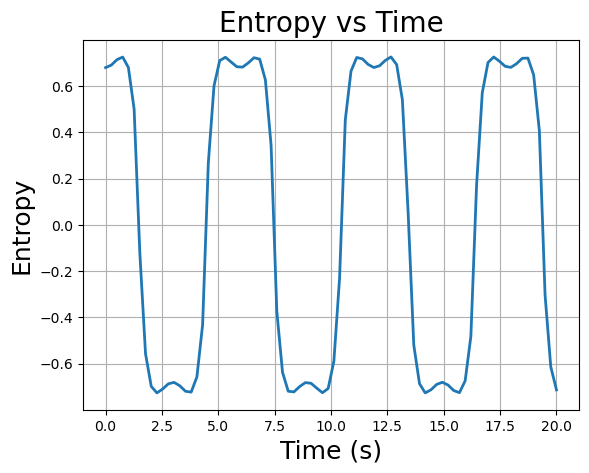

In [613]:
E4, V4 = LA.eig(H4) #eigenvalues and eigenvectors for Hamiltonian
idx = np.argsort(E4) 
E4 = E4[idx]
V4 = V4[:, idx]
psi_t = np.zeros((4, length), dtype = complex)

for h in range(length): 
    Udt = expm(-1j*H4*time[h]/h_bar)
    psi_t[:,h] = Udt @ V4[:,0]
    
rho_t = np.zeros((length,4,4), dtype = complex)
for i in range(length):
    rho_t[i] = np.outer(psi_t[:,i], psi_t[:,i].T)

par_rho_t = np.zeros((length,2,2))
for j in range(length): 
    par_rho_t[j] = partial_A(rho_t[j])

entropy_t = np.zeros(length)
for k in range(length):
    entropy_t[k] = -np.trace((par_rho_t[k]) @ logm(par_rho_t[k]))
    
plt.plot(time, entropy_t, linewidth = 2)
plt.xlabel('Time (s)', fontsize = 18)
plt.ylabel('Entropy', fontsize = 18)
plt.title('Entropy vs Time', fontsize = 20)
plt.grid(True)
